<a href="https://colab.research.google.com/github/Dutra-Apex/AOT-GAN-for-Inpainting/blob/master/Code/DS_Session_11_09_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
# Importing all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Mounting drive to colab, for detailed instructions, see: https://colab.research.google.com/notebooks/snippets/drive.ipynb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loads the data based on where it is stored on your personal drive
# https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset/data
ds_path = "/content/drive/My Drive/JoC_DS_Sessions/Datasets/"
ds_original = pd.read_csv(ds_path+'us_real_estate_data.csv')

In [ ]:
# Take a look at the 1st 10 rows in the data
ds_original.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


# Data Cleaning

Our goal is to clean the invalid values in the dataset
While there are many reliable methods of dealing with missing values, they do require more advanced techniques. For now, we will only remove the rows containing missing values.

In [ ]:
# Make a copy of the original dataset
# All cleaning with be done in ds_cleaned only
ds_cleaned = ds_original.copy()

In [ ]:
# Checking how many NaN values are there on each column
print("Column vs Percent of Values that are NaN \n")
for column in ds_original.columns:
    nan_count = ds_original[column].isna().sum()
    print(f"{column}: {round(nan_count/len(ds_original)*100, 2)}%")

Column vs Percent of Values that are NaN 

status: 0.0%
bed: 14.35%
bath: 12.58%
acre_lot: 29.46%
city: 0.01%
state: 0.0%
zip_code: 0.02%
house_size: 32.36%
prev_sold_date: 50.73%
price: 0.01%


In [ ]:
# Let's stick with the naive approach of dealing with missing values - simply remove them
# We can do this since we have a lot of data available
print("Total number of rows in the dataset:", len(ds_original))

Total number of rows in the dataset: 904966


In [ ]:
# Delete the "prev_sold_date" as it has a lot of NaN values
del ds_cleaned['prev_sold_date']

In [ ]:
# Now, drop all rows where NaN values are present
ds_cleaned = ds_cleaned.dropna()

In [ ]:
# Check for missing values again
print("Column vs Percent of Values that are NaN \n")
for column in ds_cleaned.columns:
    nan_count = ds_cleaned[column].isna().sum()
    print(f"{column}: {round(nan_count/len(ds_cleaned)*100, 2)}%")

Column vs Percent of Values that are NaN 

status: 0.0%
bed: 0.0%
bath: 0.0%
acre_lot: 0.0%
city: 0.0%
state: 0.0%
zip_code: 0.0%
house_size: 0.0%
price: 0.0%


In [ ]:
# Now ds_cleaned is the fully cleaned data
ds_cleaned.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,145000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,179000.0


In [ ]:
# However, notice that we lost over half of our data
print("Total number of rows in the dataset:", len(ds_cleaned))

Total number of rows in the dataset: 413083


We still have 400k rows, so we will be able to perform our analysis.

# Q1) How expensive is a typical house in New Jersey?

A common way of thinking about the typical price of something is to think of the mean (or average) of that. So let's calculate it.


In [ ]:
# First, we need to isolate the NJ data:
nj_data = ds_cleaned[ds_cleaned['state'] == "New Jersey"]
nj_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
30126,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,333490.0
45320,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,333490.0
385082,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,333490.0
388797,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,333490.0
389915,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,333490.0


In [ ]:
# Now, we can easily get the average prices
print("Average house price in NJ: $", round(nj_data['price'].mean(), 2))

Average house price in NJ: $ 575461.92


However, in this case, is the mean the best way to answer the question? Does it really represent the typical price of a house?

To answer that, let us look at the distribution of our data. To visualize a distribution, we can plot a histogram of our values

#### Plot example: Histogram

Text(0, 0.5, 'Quantity')

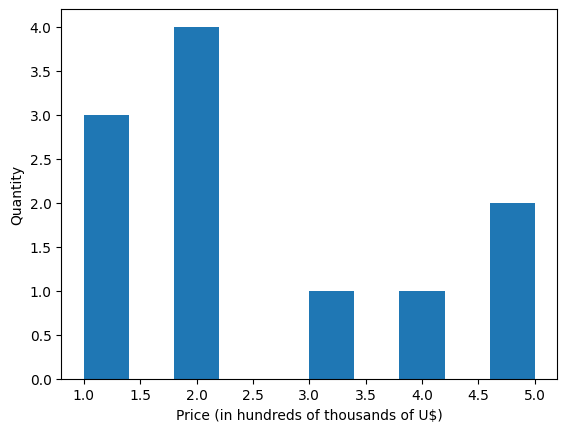

In [ ]:
values = [1, 1, 1, 2, 2, 2, 2, 3, 4, 5, 5]
plt.hist(values)
plt.xlabel("Value")
plt.ylabel("Quantity")
plt.show()

A histogram allows us to see how many items of a given value there are. In the example above, we initialize a sample array 'values' and plot its histogram. On the plot, we can see that there are 3 items with value of 1, 4 items with value of 2, and so on.

The histogram above has 5 bars (also called bins). Each bar groups together values that are similar, or identical in value.
For a more in-depth overview of histograms, check: https://chartio.com/learn/charts/histogram-complete-guide/


#### Continuing the question

Now, we may plot the histogram of the price data

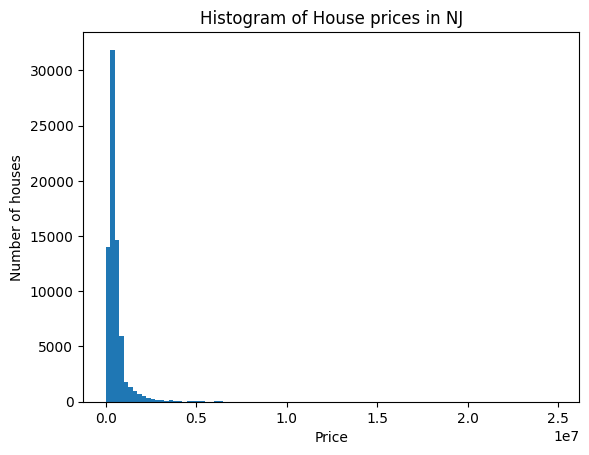

In [ ]:
# Plot a histogram of the NJ house price data
plt.title("Histogram of House prices in NJ")
plt.hist(nj_data['price'], bins=100)
plt.xlabel("Price")
plt.ylabel("Number of houses")
plt.show()

As you can see, while a large amount of data lies within the 0 to 5 million range (expressed in the x axis as the (0.0, 0.5) interval). However, we do have houses with much higher prices, going up to 25 million. Those houses are called *outliers*. They are extreme points that do not represent the overrall data.

When we calculate the mean, we add all the price values in our nj_data (including the outliers) and divide by how many houses we have. Because we include the outliers in this calculation, the value of the mean becomes *skewed*. Hence, the mean of the data does not represent the typical house price.

Here's an example that illustrates this:

In [ ]:
sample_values = np.array([1, 1, 1, 2, 3, 3, 3, 4, 4, 4, 5, 5, 180])
print("Mean of values: ", round(sample_values.mean(), 2))
print("Median of prices: ", np.median(sample_values))

Mean of values:  16.62
Median of prices:  3.0


The mean is **much** higher than all the values of the data, except for one. This clearely is not an accurate representation of the typical value.
When the data has many outliers, it is common practice to use the *median* value of the data to represent its typical value. In our example, the median is 3, which is a much more accurate representation of a typical value.

We can get the median of our nj_data as follows:

In [ ]:
# Now, we can easily get the average prices
print("Median house price in NJ: $", round(nj_data['price'].median(), 2))

Median house price in NJ: $ 407500.0


### Bonus question: Improving our nj_data price histogram

We can improve our histogram by limiting the range of our data, as well as adding the median price to the graph:

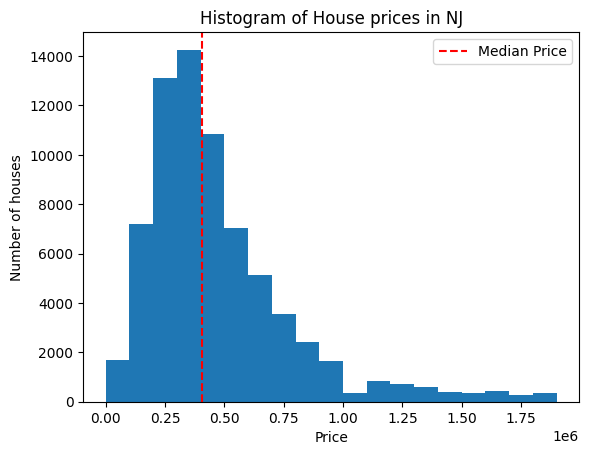

In [ ]:
# Determines the bin edges to be between 0 and 2 million, with one bin every 100,000 value
bin_edges = [i for i in range(0, 2*10**6, 10**5)]

plt.title("Histogram of House prices in NJ")
plt.hist(nj_data['price'], bins=bin_edges)
plt.xlabel("Price")
plt.ylabel("Number of houses")

# Plots a dashed line at the median value, with color red.
plt.axvline(x=nj_data['price'].median(), color='r', label="Median Price", linestyle='--')
plt.legend()
plt.show()

### Bonus question: What is the probability of finding a house in NJ that costs more than a million dollars?


In [ ]:
# Probability = Number of desired outcomes/Number of total possibilities
# Our total is the total number of houses in NJ
# Our desired is the number of house over 1 million dollars cost

n_total = len(nj_data)
n_desired = len(nj_data[nj_data['price'] >= 10**6])
print("Probability is:", round(n_desired/n_total, 5) * 100, "%")

Probability is: 9.037 %


# Q2) What are the states/territories with the highest mean and median house prices?

In [ ]:
# First we need to get a list of all states in our dataset
list_states = ds_cleaned['state'].unique()
print(list_states)

['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut' 'New Jersey'
 'New York' 'New Hampshire' 'Vermont' 'Rhode Island' 'Wyoming' 'Maine'
 'Pennsylvania' 'West Virginia' 'Delaware']


In [ ]:
# Then we can organize the median and mean house prices in each state as follows:
dict_means = {}
dict_medians = {}

for state in list_states:
  dict_means[state] = np.mean(ds_cleaned[ds_cleaned['state']==state]['price'])
  dict_medians[state] = np.median(ds_cleaned[ds_cleaned['state']==state]['price'])

In [ ]:
# Finally, we sort the information to be able to visualize the states with highest mean/median values:
# For more information on sorting dictionaries, visit: https://www.geeksforgeeks.org/python-sort-a-dictionary/#
sorted_means = dict(sorted(dict_means.items(), key=lambda item: item[1], reverse = True))
sorted_medians = dict(sorted(dict_medians.items(), key=lambda item: item[1], reverse = True))

In [ ]:
sorted_medians

{'Virgin Islands': 1295000.0,
 'New York': 895000.0,
 'Massachusetts': 649900.0,
 'Wyoming': 535000.0,
 'New Hampshire': 450000.0,
 'New Jersey': 407500.0,
 'Rhode Island': 389900.0,
 'Vermont': 375000.0,
 'Maine': 344900.0,
 'Connecticut': 319900.0,
 'Delaware': 295000.0,
 'Pennsylvania': 279900.0,
 'Puerto Rico': 145000.0,
 'West Virginia': 62500.0}

In [ ]:
sorted_means

{'Virgin Islands': 1953334.3070175438,
 'New York': 1532066.8280808714,
 'Massachusetts': 1056067.5250072274,
 'New Hampshire': 642339.2626155231,
 'New Jersey': 575461.915253776,
 'Vermont': 572109.4284170232,
 'Wyoming': 535000.0,
 'Maine': 529820.2938722295,
 'Rhode Island': 526744.7998375305,
 'Connecticut': 503652.60612973914,
 'Pennsylvania': 393789.6828546969,
 'Puerto Rico': 391127.3780376868,
 'Delaware': 341894.14762741653,
 'West Virginia': 62500.0}

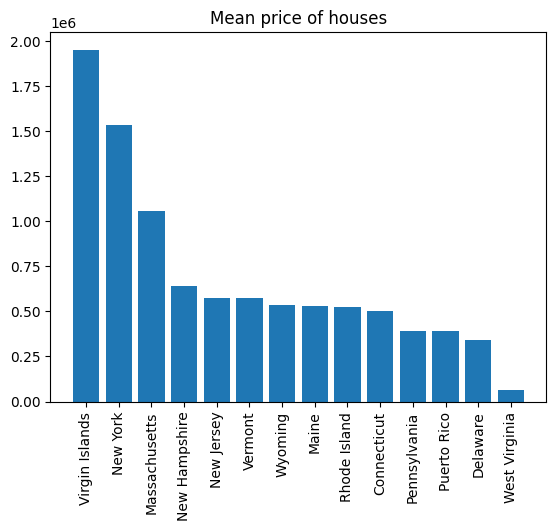

In [ ]:
# We can also visualize our values through a bar plot:
plt.title("Mean price of houses")
plt.bar(range(len(list_states)), sorted_means.values(), tick_label=list(sorted_means.keys()))
plt.xticks(rotation=90)
plt.show()

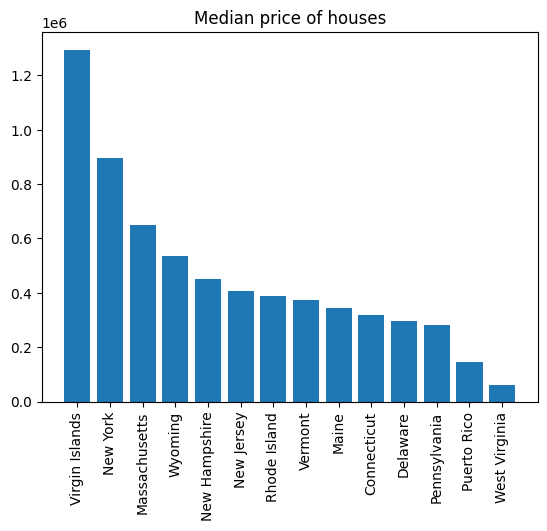

In [ ]:
plt.title("Median price of houses")
plt.bar(range(len(list_states)), sorted_medians.values(), tick_label=list(sorted_medians.keys()))
plt.xticks(rotation=90)
plt.show()

### Bonus question: In what states is the median equal or higher to the mean?

We saw in our nj_data histogram that the distribution of house prices was **right skewed**, which causes the mean of the data to be higher than the median. We also discussed that this behavior is expected when we are dealing with price data. Are there any States where this doesn't happen? Can we identify the cause for this unexpected behavior?

In [ ]:
# We can identify those states with a simple loop:
for state in list_states:
  if dict_medians[state] >= dict_means[state]:
    print(state)

Wyoming
West Virginia


In [ ]:
# Now we can isolate the data for those states:
wyoming_data = ds_cleaned[ds_cleaned['state'] == 'Wyoming']
west_virginia_data = ds_cleaned[ds_cleaned['state'] == 'West Virginia']

In [ ]:
# When taking a peek at the data we can already identify the cause of this behavior
wyoming_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
214489,for_sale,3.0,3.0,0.29,Cody,Wyoming,82414.0,1935.0,535000.0
234939,for_sale,3.0,3.0,0.29,Cody,Wyoming,82414.0,1935.0,535000.0
237632,for_sale,3.0,3.0,0.29,Cody,Wyoming,82414.0,1935.0,535000.0


In [ ]:
west_virginia_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
472451,for_sale,4.0,2.0,0.17,Wyoming,West Virginia,24898.0,1860.0,62500.0
532762,for_sale,4.0,2.0,0.17,Wyoming,West Virginia,24898.0,1860.0,62500.0
537469,for_sale,4.0,2.0,0.17,Wyoming,West Virginia,24898.0,1860.0,62500.0


After looking at the first entry of the data, we can see why those states have a median price equal to their mean price, as each State has only three entries, and those entries are duplicated.

# 3) Based on the New York data, how much would a house with 3bd and 2bath cost? What about a house with 15 bd and 1bath?

In [ ]:
# We start by isolating the New York data
ny_data = ds_cleaned[ds_cleaned['state'] == "New York"]

In [ ]:
ny_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
30149,for_sale,3.0,1.0,60.00,Berlin,New York,12022.0,1176.0,175000.0
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54258,for_sale,4.0,2.0,0.24,Copake,New York,12521.0,1239.0,225000.0
54259,for_sale,3.0,3.0,1.90,Copake,New York,12516.0,1800.0,419000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0


### Approach 1) Simple median model

One way to answer the question is to take the median price of all houses that satisfy the condition.

In [ ]:
# We can filter the data to select only the houses with 3 beds and 2 baths
sample_data = ny_data[ny_data['bed'] == 3]
sample_data = sample_data[sample_data['bath'] == 2]
sample_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price
54248,for_sale,3.0,2.0,2.02,Claverack,New York,12521.0,1600.0,425000.0
54262,for_sale,3.0,2.0,2.00,Copake,New York,12517.0,1482.0,365000.0
54268,for_sale,3.0,2.0,2.90,Hillsdale,New York,12529.0,1404.0,374900.0
54278,for_sale,3.0,2.0,1.20,Millerton,New York,12546.0,1350.0,375000.0
54446,for_sale,3.0,2.0,10.00,Austerlitz,New York,12017.0,1152.0,489900.0


In [ ]:
# Once we have the data, we can get its median, and this is our answer:
print(np.median(sample_data['price']))

684800.0


In [ ]:
# However, if we try to do the same for houses with 15 beds and 1 bath we run into a problem:
sample_data = ny_data[ny_data['bed'] == 15]
sample_data = sample_data[sample_data['bath'] == 1]
sample_data.head(5)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,price


There are no houses that satisfy our condition, so how can we answer the question?

### Approach 2) Linear Regression (LR)

Review Slides on: https://docs.google.com/presentation/d/1UoZxtQ5ZvDovpHc0uFzSzhRaWv7kHFP4S0N6Gy7zHYc/edit?usp=sharing

In [ ]:
# Librart typically used for Linear Regression
import statsmodels.api as sm

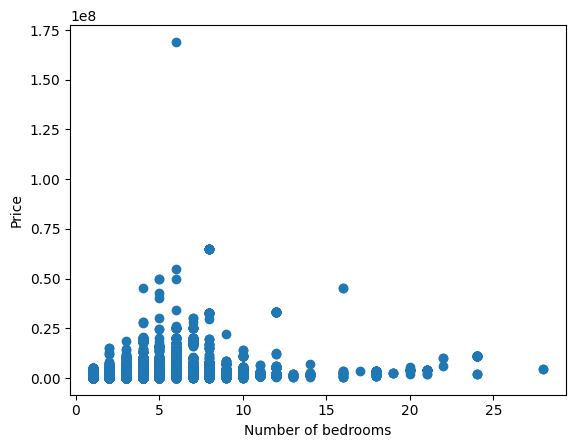

In [ ]:
# Let us visualize Bedrooms vs Price to get a sense of how the data looks like
plt.scatter(ny_data[ny_data['bed']<30]['bed'], ny_data[ny_data['bed']<30]['price']) # We filtered the data for visualization purposes
plt.xlabel("Number of bedrooms")
plt.ylabel("Price")
plt.show()

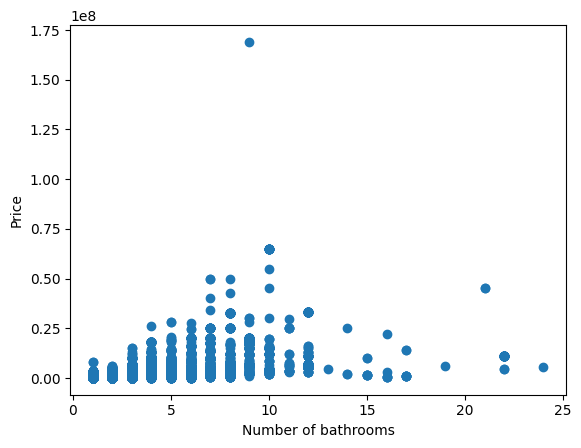

In [ ]:
# Now we do the same for bathrooms vs price
plt.scatter(ny_data[ny_data['bath']<30]['bath'], ny_data[ny_data['bath']<30]['price'])
plt.xlabel("Number of bathrooms")
plt.ylabel("Price")
plt.show()

From the data, we can see that we have a **positive relationship** between # of beds, # of baths, and house price. This means that as the number of bedrooms and bathrooms increase, so does the price of the house. However, the relationship is not necessarily strong, as the data contain many outliers (houses with a high number of bath or bed that are not very expensive). We will see how this affects the accuracy of our linear model later on.

### Selecting our data

To use linear regression, we need to select our dependent (y) and independent (X) variables. In this this case, because we want to predict price from number of bedrooms and bathrooms, our y variable is price, and our x variable is # beds and # baths.

In [ ]:
X = ny_data[['bed', 'bath']]
y = ny_data['price']

As seen before, LR works by solving the following equation: $$ \hat{\beta} = (X^TX)^{-1}X^TY$$

Where:

Beta: Coefficients of the equation

X: Matrix with independent values

Y: Matrix with dependent values

The vector Beta contains the coefficients to our LR model, which can be written as follows:

$$ \hat{y} = a_1x_1 + a_2x_2 + b$$

In the context of our problem, the model is:

$$ HousePrice = a_1 \times bed + a_2 \times bath + b$$

If we want Beta to contain the constant term **b**, we need to add a column of ones into our X data, which can be done as follows:



In [ ]:
X = sm.add_constant(X)
X

,const,bed,bath
30149,1.0,3.0,1.0
54248,1.0,3.0,2.0
54258,1.0,4.0,2.0
54259,1.0,3.0,3.0
54262,1.0,3.0,2.0
...,...,...,...
904934,1.0,4.0,8.0
904935,1.0,6.0,8.0
904936,1.0,4.0,5.0
904937,1.0,4.0,7.0


### Train/Test split

In almost any model, you need to split your data into training and testing. Most models utilize information from the data to learn. If you want to evaluate the performance of the model, you need to do so in a set of data that the model has not seen before, otherwise your evaluation will be biased!

A typical train/test split is 80/20, meaning that we will use 80% of our data to train the model, and 20% to evaluate it.

Selecting train/test sets should be done at random, and we can do so with the following function:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# This function splits our (X,y) data into training and testing sets
# The random_state=42 is used to guarantee replicability, anyone who uses 42 as their state will get the same train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training and evaluating the model

We may now perform Linear Regression in our data

In [ ]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     6287.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:42:40   Log-Likelihood:            -5.7632e+05
No. Observations:               35691   AIC:                         1.153e+06
Df Residuals:                   35688   BIC:                         1.153e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.845e+05   2.79e+04    -17.338      0.000   -5.39e+05    -4.3e+05
bed        -2.634e+05   8117.430    -32.454      0.000   -2.79e+05   -2.48e+05
bath        1.048e+06   1.06e+04     98.731      0.000    1.03e+06    1.07e+06
==============================================================================
Omnibus:                    69215.532   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        560100534.227
Skew:                          14.776   Prob(JB):                         0.00
Kurtosis:                     615.993   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on our coefficients (located under 'coef' in our summary above), we have this equation as our model:

$$House Price = −4.845×10^
5
 −2.634×10^5
 ×bed+1.048×10^
6
 ×bath$$


In [ ]:
# We can now use our model on our test set
predictions = model.predict(X_test)

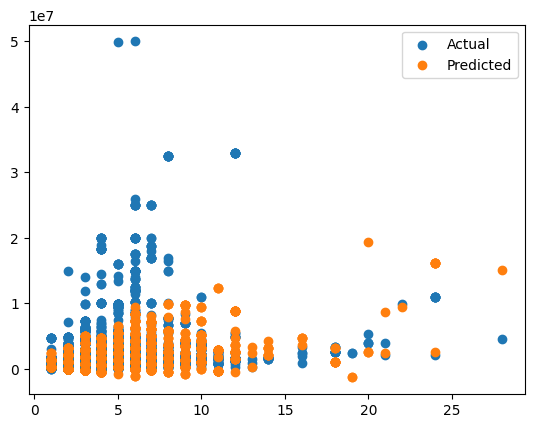

In [ ]:
# We can also visualize our predictions as follows:
plt.scatter(X_test['bed'], y_test, label="Actual")
plt.scatter(X_test['bed'], predictions, label="Predicted")
plt.legend()
plt.show()

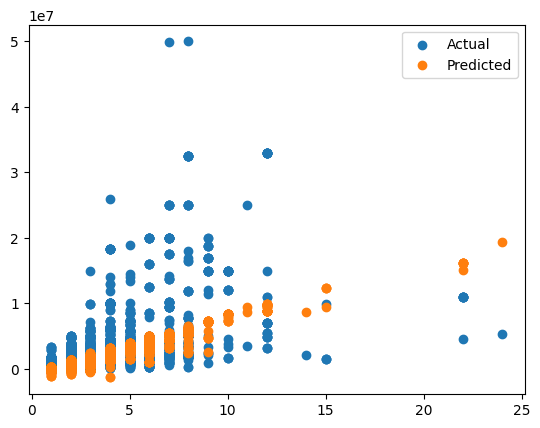

In [ ]:
plt.scatter(X_test['bath'], y_test, label="Actual")
plt.scatter(X_test['bath'], predictions, label="Predicted")
plt.legend()
plt.show()

Note that we are visualizing 'bath' and 'bed' separetly, this is done to give us a sense of performance. The model was trained on both bed and bath variables, but we may isolate one variable to visualize it. Alternatively, we may also get a 3D plot of our model:

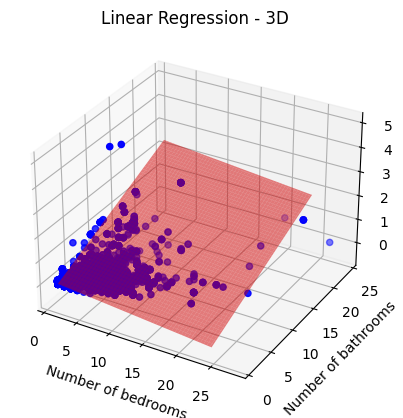

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points
ax.scatter(X_test['bed'], X_test['bath'], y_test, c='b', marker='o', label='Actual Data')

# Create a mesh grid for the predicted values
x1_range = np.linspace(X_test['bed'].min(), X_test['bath'].max(), 100)
x2_range = np.linspace(X_test['bed'].min(), X_test['bath'].max(), 100)
X1_grid, X2_grid = np.meshgrid(x1_range, x2_range)
y_pred_grid = model.predict(sm.add_constant(np.column_stack((X1_grid.ravel(), X2_grid.ravel()))))
y_pred_grid = np.array(y_pred_grid).reshape(X1_grid.shape)

# Plot the regression surface
ax.plot_surface(X1_grid, X2_grid, y_pred_grid, color='r', alpha=0.5, label='Regression Surface')
ax.set_xlabel('Number of bedrooms')
ax.set_ylabel('Number of bathrooms')
ax.set_zlabel('Price')
plt.title('Linear Regression - 3D')
plt.show()

### Measuring performance

The most common way to measure the perfoamnce of a LR model is by using R^2, which is defined as follows:

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} $$

The R^2 value typically ranges from 0 to 1. A value of 0 means that the model is just as good as using the mean of the data as its prediction. A value of 1 means that the model predicts the exact values of the data. Hence, the higher R^2, the better the model is.  

We can convert this formula into code with just a few lines:

In [ ]:
def get_r2(y_actual, y_pred):

  n = len(y_actual)
  y_mean = sum(y_actual) / n

  ssr = 0 # (Sum of Squared Residuals) Top of the fraction
  sst = 0 # (Sum of Squared Total) Bottom of the fraction
  for y_actual_i, y_pred_i in zip(y_actual, y_pred):
    ssr += (y_actual_i - y_pred_i) ** 2
    sst += (y_actual_i - y_mean) ** 2

  return 1 - (ssr / sst)

In [ ]:
# We may now get the R^2 of our model base on our test data
r2 = get_r2(y_test, predictions)
print("R^2 of our model is:", r2)

R^2 of our model is: 0.28918126581445036


In [ ]:
# We can also use our model to predict how much a house with 3 bedrooms and 2 bathrooms would cost:
final_answer = model.predict([1, 3, 2])
print("A house in NY with 3bd and 2bath woud cost: $", round(final_answer[0],3), "according to our model")

A house in NY with 3bd and 2bath woud cost: $ 820312.099 according to our model


Our R^2 value seems relatively low, but we can improve it by adding more independent variables, as follows:

In [ ]:
X_new = sm.add_constant(ny_data[['bed', 'bath', 'house_size']])
y = ny_data['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
model_new = sm.OLS(y_train, X_train).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     5513.
Date:                Fri, 10 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:58:27   Log-Likelihood:            -5.7491e+05
No. Observations:               35691   AIC:                         1.150e+06
Df Residuals:                   35687   BIC:                         1.150e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.794e+05   2.69e+04    -17.843      0.000   -5.32e+05   -4.27e+05
bed        -3.129e+05   7856.708    -39.830      0.000   -3.28e+05   -2.98e+05
bath        7.237e+05   1.18e+04     61.203      0.000    7.01e+05    7.47e+05
house_size   500.4400      9.243     54.144      0.000     482.324     518.556
==============================================================================
Omnibus:                    69530.113   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        692959703.729
Skew:                          14.842   Prob(JB):                         0.00
Kurtosis:                     684.976   Cond. No.                     6.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
predictions = model_new.predict(X_test)
r2 = get_r2(y_test, predictions)
r2

0.3558532984754764

### Bonus question:

Can you improve the model even further?